# HIMPUNAN DATA

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import pareto

from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.dates as mdates

!pip install pyswarms #PSO Partical Swam Optimation
import pyswarms as ps #PSO
import numba #untuk GA

from sklearn import linear_model


from matplotlib import pyplot as plt
from datetime import datetime, timedelta

from sklearn.preprocessing import Normalizer
from pyswarms.utils.functions import single_obj as fx #PSO
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface) #PSO
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score #Utilitas
import plotly.express as px 

ERROR: Invalid requirement: '#PSO'


In [109]:
index_gabungan = pd.read_excel('E:\\Data_Urang\Informatics_Research_Centre\project-covid\Covid\index_gabungan.xlsx')
index_gabungan = index_gabungan.drop(['Unnamed: 0'], axis=1)

index_gabungan

Date  New_Cases  New_Deaths  New_Recovered  New_Active_Cases  \
0    7/6/2021       9439         137           6100              3202   
1    7/7/2021       9365         142           3655              5568   
2    7/8/2021      12974         136          10854              1984   
3    7/9/2021      13111         138          15029             -2056   
4   7/10/2021      12920          87          16839             -4006   
5   7/11/2021      13133          46          20602             -7515   
6   7/12/2021      14622         134          20477             -5989   
7   7/13/2021      12183          68           4571              7544   
8   7/14/2021      12669          63           3069              9537   
9   7/15/2021      12691         141           3034              9516   
10  7/16/2021      12416         132           8448              3836   
11  7/17/2021      10168          67          11610             -1509   
12  7/18/2021       9129         158          11852             -2881   
13  7/19/2021       5000         250          12659             -7909   
14  7/20/2021       6213         268          12066             -6121   
15  7/21/2021       5904          95          10545             -4736   
16  7/22/2021       7060         195          10631             -3766   
17  7/23/2021       8033         157          14510             -6634   
18  7/24/2021       8359         151          14528             -6320   
19  7/25/2021       5394         157          14225             -8988   

    Total_Cases  Total_Deaths  Total_Recovered  Total_Active_Cases  \
0        600929          8854           497408               94667   
1        610294          8996           501063              100235   
2        623268          9132           511917              102219   
3        636379          9270           526946              100163   
4        649299          9357           543785               96157   
5        662432          9403           564387               88642   
6        677054          9537           584864               82653   
7        689237          9605           589435               90197   
8        701906          9668           592504               99734   
9        714597          9809           595538              109250   
10       727013          9941           603986              113086   
11       737181         10008           615596              111577   
12       746310         10166           627448              108696   
13       751310         10416           640107              100787   
14       757523         10684           652173               94666   
15       763427         10779           662718               89930   
16       770487         10974           673349               86164   
17       778520         11131           687859               79530   
18       786879         11282           702387               73210   
19       792273         11439           716612               64222   

    Location_Level  ...     idr_close    ihsg_high     ihsg_low   ihsg_close  \
0                0  ...  14495.000000  6054.607910  6013.062012  6047.110840   
1                0  ...  14568.700195  6066.994141  6022.305176  6044.037109   
2                0  ...  14569.200195  6080.222168  6028.607910  6039.895996   
3                0  ...  14618.700195  6060.541016  6026.547852  6039.844238   
4                0  ...  14618.700195  6060.541016  6026.547852  6039.844238   
5                0  ...  14618.700195  6060.541016  6026.547852  6039.844238   
6                0  ...  14521.000000  6097.120117  6055.985840  6078.567871   
7                0  ...  14558.500000  6114.286133  6004.821777  6012.032227   
8                0  ...  14542.099609  6013.041992  5947.618164  5979.214844   
9                0  ...  14473.000000  6046.753906  5982.804199  6046.753906   
10               0  ...  14563.000000  6079.139160  6051.757813  6072.509766   
11               0  ...  14563.000000  6079.

In [110]:
index_gabungan.columns

Index(['Date', 'New_Cases', 'New_Deaths', 'New_Recovered', 'New_Active_Cases',
       'Total_Cases', 'Total_Deaths', 'Total_Recovered', 'Total_Active_Cases',
       'Location_Level', 'New_Cases_per_Million', 'Total_Cases_per_Million',
       'New_Death_per_Million', 'Total_Deaths_per_Million',
       'Total_Deaths_per_100rb', 'Case_Fatality_Rate', 'Case_Recovered_Rate',
       'Growth_Factor_of_New_Cases', 'Growth_Factor_of_New_Deaths',
       'Unnamed: 0.1', 'idr_high', 'idr_close', 'ihsg_high', 'ihsg_low',
       'ihsg_close', 'retail_and_recreation', 'grocery_and_pharmacy', 'parks',
       'transit_stations', 'workplaces', 'residential'],
      dtype='object')

Karena kita disini ingin meneliti efektifitas PPKM terhadap perekonomian dan mobilitas, maka 'Total_Cases', 'Total_Deaths', 'Total_Recovered', 'Total_Active_Cases', 'Location_Level', 'New_Cases_per_Million', 'Total_Cases_per_Million', 'New_Death_per_Million', 'Total_Deaths_per_Million', 'Total_Deaths_per_100rb' kita drop. 

In [112]:
index_gabungan = index_gabungan.drop(['Unnamed: 0.1', 'Total_Cases', 'Total_Deaths', 'Total_Recovered', 'Total_Active_Cases', 
                                      'Location_Level', 'New_Cases_per_Million', 'Total_Cases_per_Million', 
                                      'New_Death_per_Million', 'Total_Deaths_per_Million', 'Total_Deaths_per_100rb',
                                     'idr_high', 'ihsg_high', 'ihsg_low', 'Case_Fatality_Rate', 'Case_Recovered_Rate'], axis=1)
index_gabungan

Date  New_Cases  New_Deaths  New_Recovered  New_Active_Cases  \
0    7/6/2021       9439         137           6100              3202   
1    7/7/2021       9365         142           3655              5568   
2    7/8/2021      12974         136          10854              1984   
3    7/9/2021      13111         138          15029             -2056   
4   7/10/2021      12920          87          16839             -4006   
5   7/11/2021      13133          46          20602             -7515   
6   7/12/2021      14622         134          20477             -5989   
7   7/13/2021      12183          68           4571              7544   
8   7/14/2021      12669          63           3069              9537   
9   7/15/2021      12691         141           3034              9516   
10  7/16/2021      12416         132           8448              3836   
11  7/17/2021      10168          67          11610             -1509   
12  7/18/2021       9129         158          11852             -2881   
13  7/19/2021       5000         250          12659             -7909   
14  7/20/2021       6213         268          12066             -6121   
15  7/21/2021       5904          95          10545             -4736   
16  7/22/2021       7060         195          10631             -3766   
17  7/23/2021       8033         157          14510             -6634   
18  7/24/2021       8359         151          14528             -6320   
19  7/25/2021       5394         157          14225             -8988   

    Growth_Factor_of_New_Cases  Growth_Factor_of_New_Deaths     idr_close  \
0                         0.87                         1.14  14495.000000   
1                         0.99                         1.04  14568.700195   
2                         1.39                         0.96  14569.200195   
3                         1.01                         1.01  14618.700195   
4                         0.99                         0.63  14618.700195   
5                         1.02                         0.53  14618.700195   
6                         1.11                         2.91  14521.000000   
7                         0.83                         0.51  14558.500000   
8                         1.04                         0.93  14542.099609   
9                         1.00                         2.24  14473.000000   
10                        0.98                         0.94  14563.000000   
11                        0.82                         0.51  14563.000000   
12                        0.90                         2.36  14563.000000   
13                        0.55                         1.58  14491.000000   
14                        1.24                         1.07  14664.500000   
15                        0.95                         0.35  14620.000000   
16                        1.20                         2.05  14536.000000   
17                        1.14                         0.81  14548.700195   
18                        1.04                         0.96  14548.700195   
19                        0.65                         1.04  14548.700195   

     ihsg_close  retail_and_recreation  grocery_and_pharmacy  parks  \
0   6047.110840                    -19                     5    -45   
1   6044.037109                    -15                    10    -38   
2   6039.895996                    -18                     6    -41   
3   6039.844238                    -16                     6    -39   
4   6039.844238                    -16                     7    -37   
5   6039.844238                    -14                     7    -33   
6   6078.567871                    -16                    11    -36   
7   6012.032227                    -19                     5    -42   
8   5979.214844                    -17                     7    -36   
9   6046.753906                    -22                     1    -43   
10  6072.509766                    -20                     3    -42   
11  6

## Pendataan Sesuai Tanggal PPKM 6 Juli - 25 Juli 2021

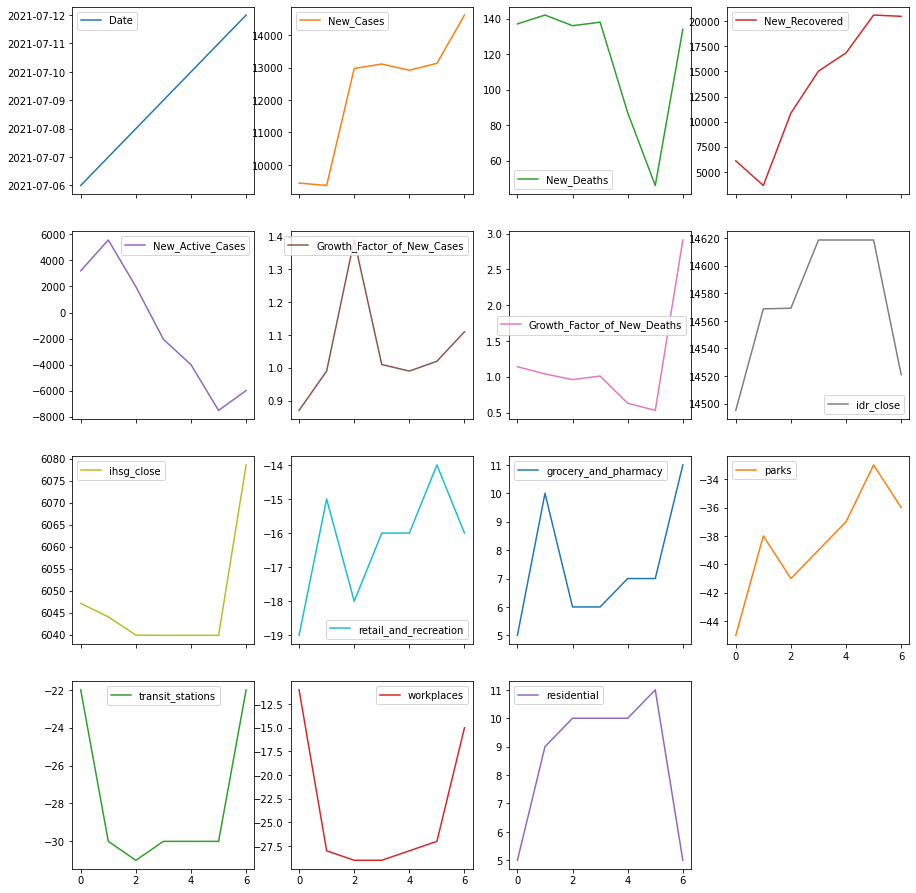

In [113]:
# Tanggal 6 Juli sampai dengan 12 Juli 2021
index_gabungan['Date'] = pd.to_datetime(index_gabungan['Date'])
start_date = '7/6/2021'
end_date = '7/12/2021'
mask = (index_gabungan['Date'] >= start_date) & (index_gabungan['Date'] <= end_date)
ppkm1 = index_gabungan.loc[mask]
ppkm1.plot(subplots=True, layout=(5,4), figsize=(15,20));

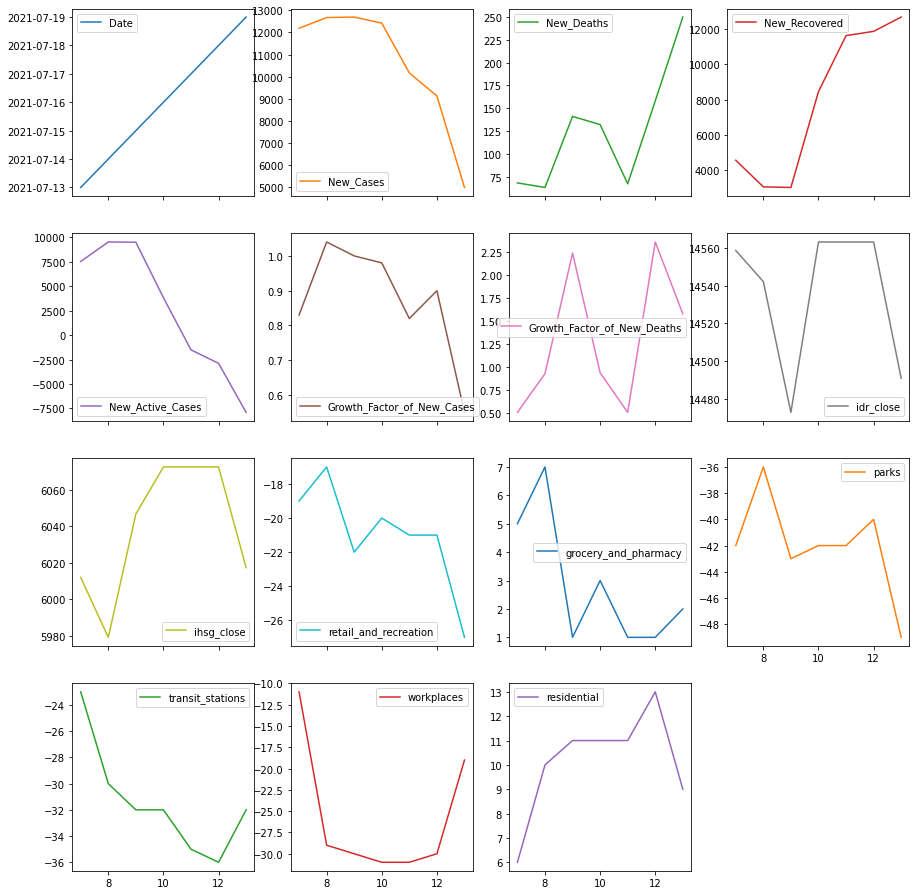

In [114]:
# Tanggal 13 juli sampai dengan 19 Juli 2021
index_gabungan['Date'] = pd.to_datetime(index_gabungan['Date'])
start_date = '7/13/2021'
end_date = '7/19/2021'
mask = (index_gabungan['Date'] >= start_date) & (index_gabungan['Date'] <= end_date)
ppkm2 = index_gabungan.loc[mask]
ppkm2.plot(subplots=True, layout=(5,4), figsize=(15,20));

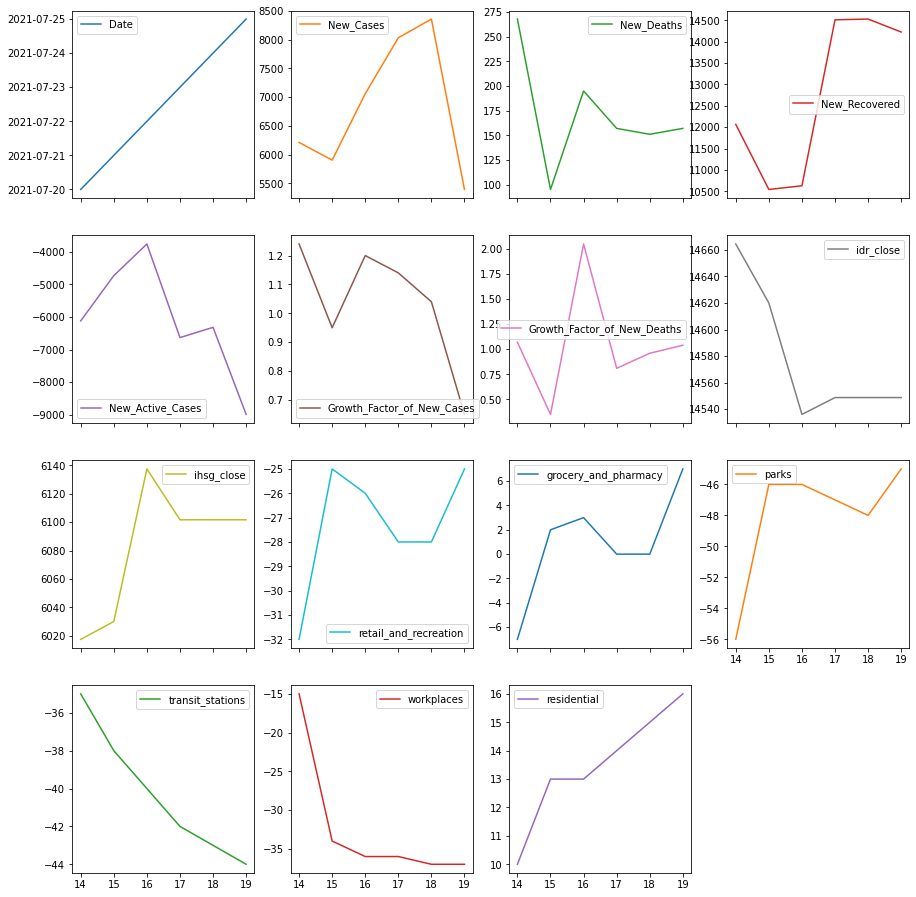

In [115]:
# Tanggal 20 juli sampai dengan 25 Juli 2021
index_gabungan['Date'] = pd.to_datetime(index_gabungan['Date'])
start_date = '7/20/2021'
end_date = '7/25/2021'
mask = (index_gabungan['Date'] >= start_date) & (index_gabungan['Date'] <= end_date)
ppkm3 = index_gabungan.loc[mask]
ppkm3.plot(subplots=True, layout=(5,4), figsize=(15,20));

## Grafik Kematian (PPKM 6 Juli - 25 Juli 2021)

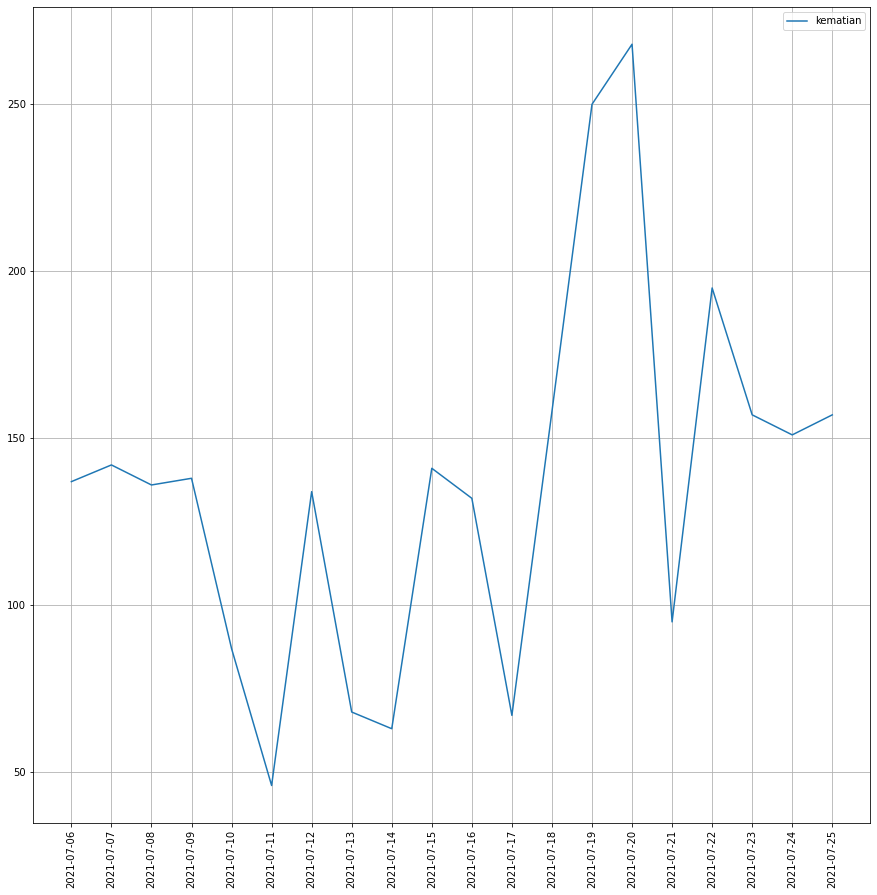

In [116]:
plt.figure(figsize=(15,15))
plt.plot(index_gabungan['Date'], index_gabungan['New_Deaths'],label='kematian')
plt.xticks(index_gabungan['Date'],rotation=90)
plt.legend(loc ="upper right")
plt.grid(True)
plt.show()

## Grafik Kasus Positif (PPKM 6 Juli - 25 Juli 2021)

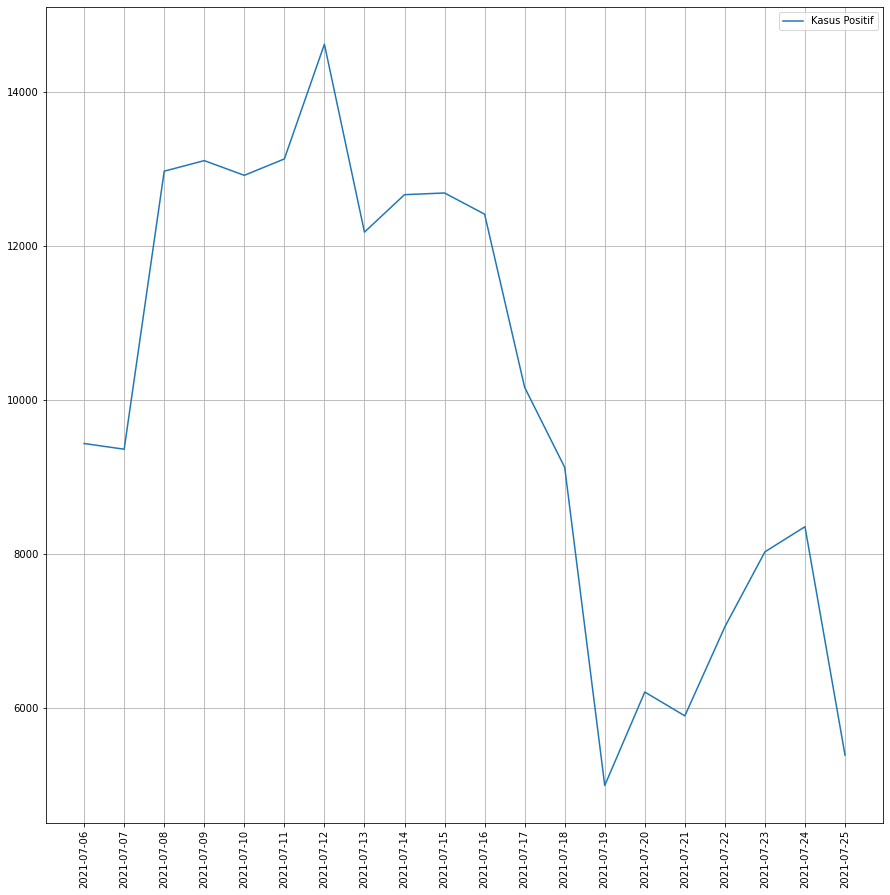

In [117]:
plt.figure(figsize=(15,15))
plt.plot(index_gabungan['Date'], index_gabungan['New_Cases'],label='Kasus Positif')
plt.xticks(index_gabungan['Date'],rotation=90)
plt.legend(loc ="upper right")
plt.grid(True)
plt.show()

## Grafik 1 USD to IDR (PPKM 6 Juli - 25 Juli 2021)

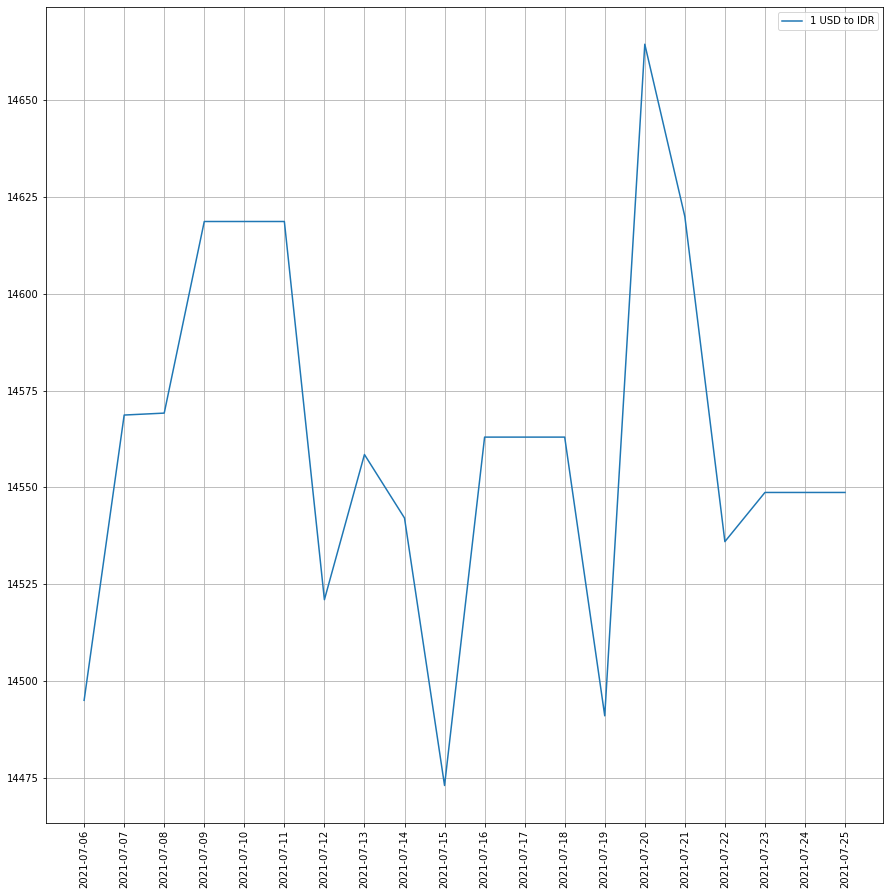

In [118]:
plt.figure(figsize=(15,15))
plt.plot(index_gabungan['Date'], index_gabungan['idr_close'],label='1 USD to IDR')
plt.xticks(index_gabungan['Date'],rotation=90)
plt.legend(loc ="upper right")
plt.grid(True)
plt.show()

## Grafik IHSG Index Jakarta (PPKM 6 Juli - 25 Juli 2021)

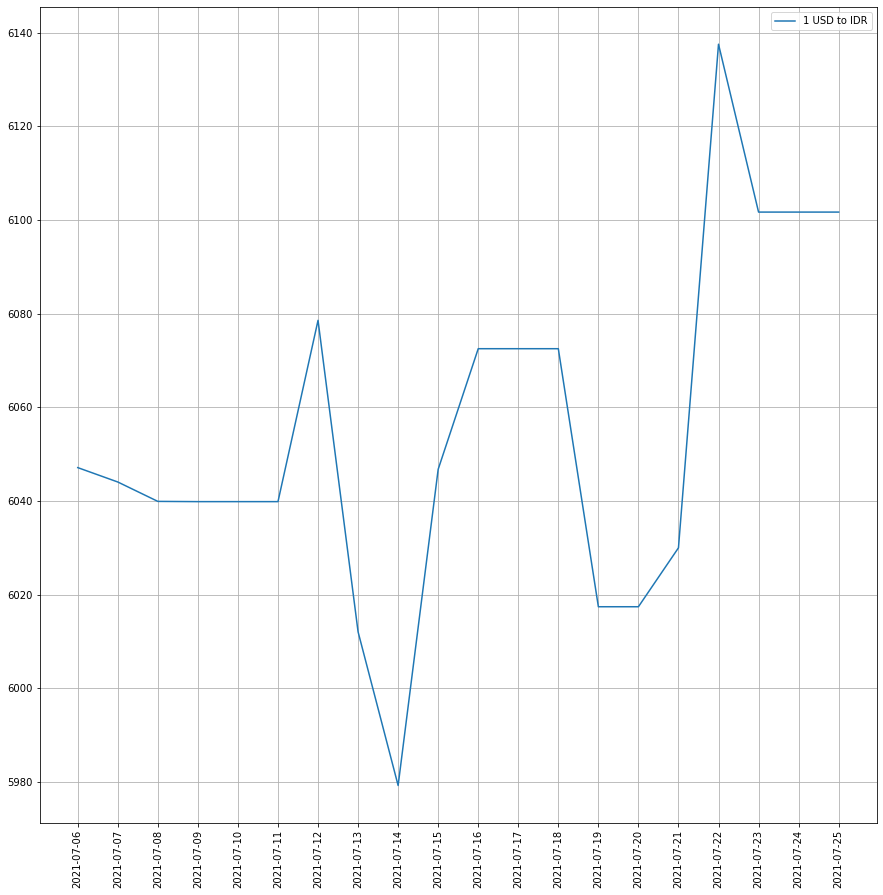

In [120]:
plt.figure(figsize=(15,15))
plt.plot(index_gabungan['Date'], index_gabungan['ihsg_close'],label='1 USD to IDR')
plt.xticks(index_gabungan['Date'],rotation=90)
plt.legend(loc ="upper right")
plt.grid(True)
plt.show()

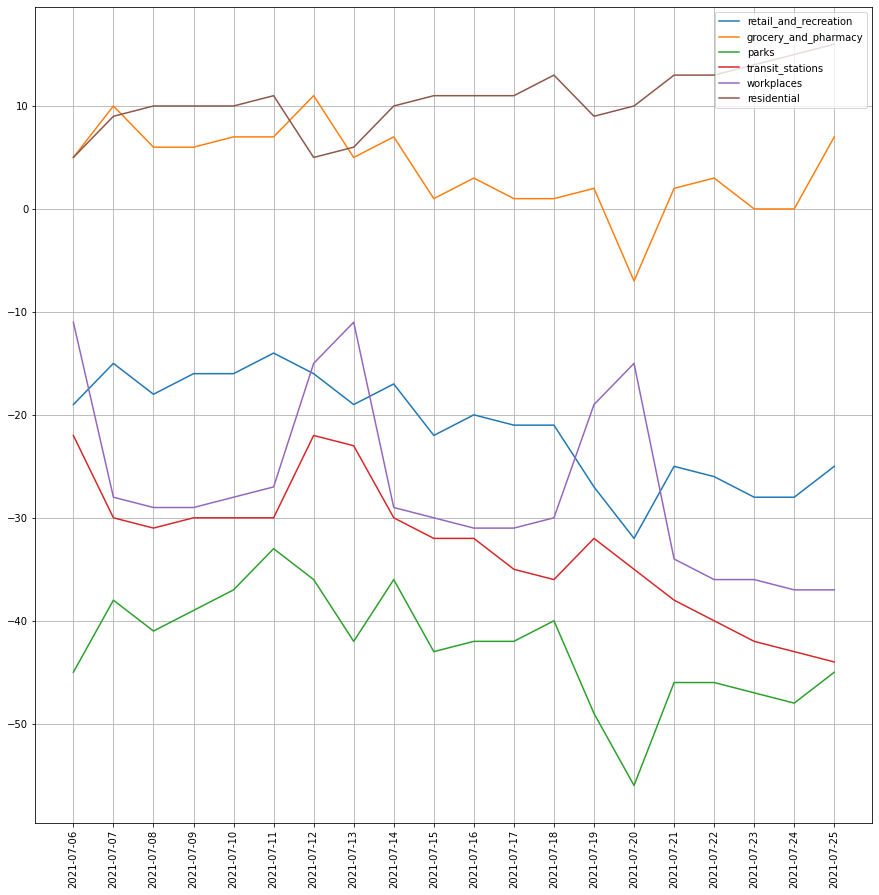

In [121]:
plt.figure(figsize=(15,15))
plt.plot(index_gabungan['Date'], index_gabungan[['retail_and_recreation','grocery_and_pharmacy','parks','transit_stations','workplaces', 'residential']])
plt.xticks(index_gabungan['Date'],rotation=90)
plt.legend(['retail_and_recreation','grocery_and_pharmacy','parks','transit_stations','workplaces', 'residential'], loc ="upper right")
plt.grid(True)
plt.show()

## Corr Data dengan Heatmap

<AxesSubplot:>

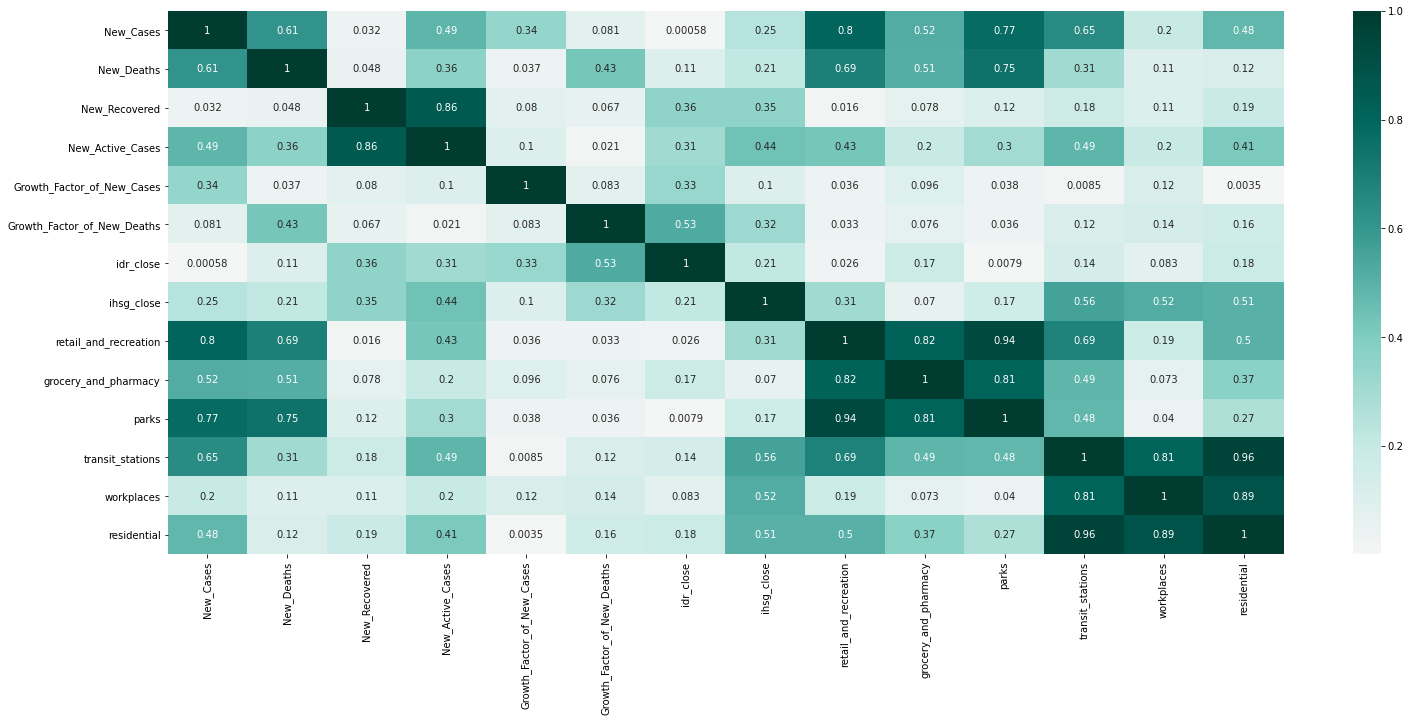

In [122]:
fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(index_gabungan.corr().abs(), center=0, cmap='BrBG', annot=True)

<AxesSubplot:>

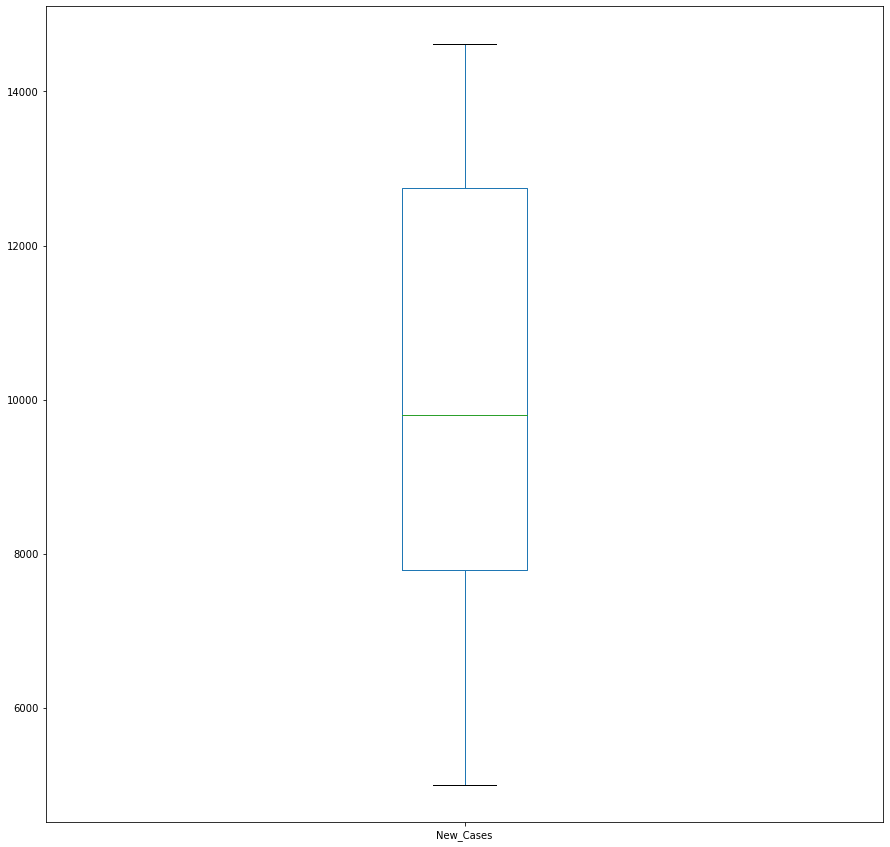

In [123]:
# Untuk melihat data pecilan
index_gabungan['New_Cases'].plot.box(figsize=(15,15))

In [124]:
index_gabungan.describe()

New_Cases  New_Deaths  New_Recovered  New_Active_Cases  \
count     20.000000   20.000000      20.000000          20.00000   
mean   10039.150000  136.100000   11265.200000       -1362.15000   
std     3053.980186   57.341911    5249.623612        6007.80949   
min     5000.000000   46.000000    3034.000000       -8988.00000   
25%     7789.750000   93.000000    7861.000000       -6170.75000   
50%     9803.500000  137.500000   11731.000000       -3323.50000   
75%    12748.250000  157.000000   14514.500000        3360.50000   
max    14622.000000  268.000000   20602.000000        9537.00000   

       Growth_Factor_of_New_Cases  Growth_Factor_of_New_Deaths     idr_close  \
count                   20.000000                    20.000000     20.000000   
mean                     0.986000                     1.178500  14561.510058   
std                      0.191597                     0.694833     48.317400   
min                      0.550000                     0.350000  14473.000000   
25%                      0.892500                     0.765000  14540.574707   
50%                      0.995000                     0.985000  14560.750000   
75%                      1.057500                     1.250000  14581.575195   
max                      1.390000                     2.910000  14664.500000   

        ihsg_close  retail_and_recreation  grocery_and_pharmacy      parks  \
count    20.000000              20.000000             20.000000  20.000000   
mean   6054.602783             -21.250000              3.850000 -42.550000   
std      37.723216               5.159304              4.107439   5.423875   
min    5979.214844             -32.000000             -7.000000 -56.000000   
25%    6037.377197             -25.250000              1.000000 -46.000000   
50%    6045.395507             -20.500000              4.000000 -42.000000   
75%    6074.024292             -16.750000              7.000000 -38.750000   
max    6137.546875             -14.000000             11.000000 -33.000000   

       transit_stations  workplaces  residential  
count         20.000000    20.00000    20.000000  
mean         -32.850000   -27.15000    10.600000  
std            6.434079     8.39345     2.980639  
min          -44.000000   -37.00000     5.000000  
25%          -36.500000   -31.75000     9.750000  
50%          -32.000000   -29.00000    10.500000  
75%          -30.000000   -25.00000    13.000000  
max          -22.000000   -11.00000    16.000000

In [125]:
index_gabungan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         20 non-null     datetime64[ns]
 1   New_Cases                    20 non-null     int64         
 2   New_Deaths                   20 non-null     int64         
 3   New_Recovered                20 non-null     int64         
 4   New_Active_Cases             20 non-null     int64         
 5   Growth_Factor_of_New_Cases   20 non-null     float64       
 6   Growth_Factor_of_New_Deaths  20 non-null     float64       
 7   idr_close                    20 non-null     float64       
 8   ihsg_close                   20 non-null     float64       
 9   retail_and_recreation        20 non-null     int64         
 10  grocery_and_pharmacy         20 non-null     int64         
 11  parks                        20 non-null     in

In [126]:
index_gabungan.columns

Index(['Date', 'New_Cases', 'New_Deaths', 'New_Recovered', 'New_Active_Cases',
       'Growth_Factor_of_New_Cases', 'Growth_Factor_of_New_Deaths',
       'idr_close', 'ihsg_close', 'retail_and_recreation',
       'grocery_and_pharmacy', 'parks', 'transit_stations', 'workplaces',
       'residential'],
      dtype='object')

### Menghapus Data Pecilan

In [75]:
# index_gabungan = pd.get_dummies(index_gabungan, columns=['idr_close', 'ihsg_close', 'retail_and_recreation','grocery_and_pharmacy', 
#                                                          'parks', 'transit_stations', 'workplaces','residential'], drop_first=True)

In [76]:
# index_gabungan = index_gabungan.loc[:, 'New_Cases':'idr_close']

# mod = sm.tsa.DynamicFactor(index_gabungan,k_factors=1,factor_order=2)
# initial_res = mod.fit(method='powell', disp=True)
# res = mod.fit(initial_res.params, disp=False)

# # endog = data_clean.loc[:, 'positif':'idr_closed']
# # mod = sm.tsa.DynamicFactor(endog,k_factors=1,factor_order=2)
# # initial_res = mod.fit(method='powell', disp=True)
# # res = mod.fit(initial_res.params, disp=False)

KeyError: 'idr_close'

NameError: name 'res' is not defined

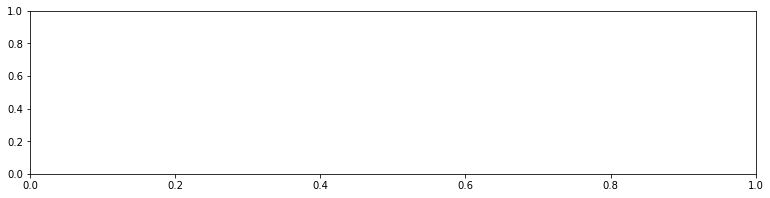

In [45]:
# # faktor analisis
# fig, ax = plt.subplots(figsize=(13,3))

# dates = index_baru.index._mpl_repr()
# ax.plot(dates, res.factors.filtered[0], label='Factor')
# ax.legend()

In [169]:
feature_names = ['New_Cases', 'New_Recovered', 'New_Active_Cases','Growth_Factor_of_New_Cases', 
                 'Growth_Factor_of_New_Deaths','idr_close', 'ihsg_close', 'retail_and_recreation',
                 'grocery_and_pharmacy', 'parks', 'transit_stations', 'workplaces','residential']
dep_var = index_gabungan[feature_names]
X_raw = dep_var.to_numpy()

n_dim = len(X_raw[0])
n_dim

13

In [170]:
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=n_dim, options=options)
cost, pos = optimizer.optimize(fx.sphere, iters=1000)

2022-02-10 15:51:34,904 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████|1000/1000, best_cost=4.39e-5
2022-02-10 15:51:38,493 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.392296159494768e-05, best pos: [-2.40619529e-03  3.95468484e-04  3.67249767e-03  1.41948128e-03
  7.91760553e-05 -1.02642910e-03  1.13779623e-04  1.74084500e-03
  3.10987379e-03 -2.81039609e-03  6.31096652e-04  5.23122780e-04
 -3.60180507e-04]


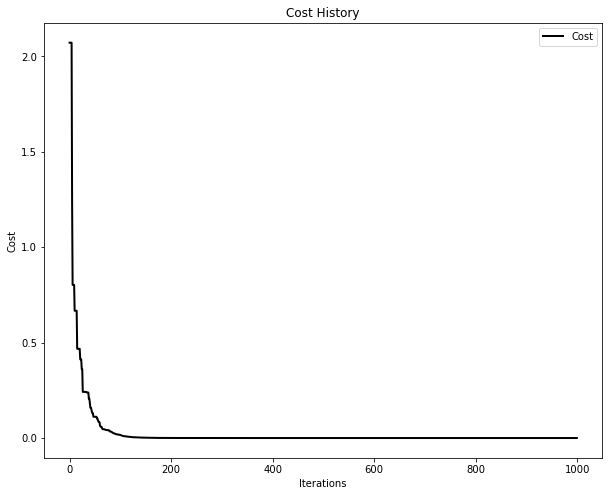

In [171]:
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

# MODELLING MACHINE LEARNING

In [172]:
X = X_raw[:,pos>0]
y = index_gabungan['New_Deaths']

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=40, test_size = 0.3)

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [174]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [176]:
regr.score(X_train,y_train)

0.8740716640746742

In [177]:
# r_sqr = res.coefficients_of_determination
# r = []
# for i in(range(len(r_sqr))):
#   sqr_raw = r_sqr[i]
#   r_raw = r_sqr[i]**0.5
#   r.append([r_raw[0],sqr_raw[0]])

# df_r = pd.DataFrame(r,columns=['r','r_sqr (Coef of Det)'])
# df_r

In [178]:
x=index_gabungan[['New_Cases', 'New_Recovered', 'New_Active_Cases','Growth_Factor_of_New_Cases',
              'Growth_Factor_of_New_Deaths','idr_close', 'ihsg_close', 'retail_and_recreation',
              'grocery_and_pharmacy', 'parks', 'transit_stations', 'workplaces','residential']].values.reshape(-1,13) #reshape sesuai dengan jumlah variable X
x

array([[ 9.43900000e+03,  6.10000000e+03,  3.20200000e+03,
         8.70000000e-01,  1.14000000e+00,  1.44950000e+04,
         6.04711084e+03, -1.90000000e+01,  5.00000000e+00,
        -4.50000000e+01, -2.20000000e+01, -1.10000000e+01,
         5.00000000e+00],
       [ 9.36500000e+03,  3.65500000e+03,  5.56800000e+03,
         9.90000000e-01,  1.04000000e+00,  1.45687002e+04,
         6.04403711e+03, -1.50000000e+01,  1.00000000e+01,
        -3.80000000e+01, -3.00000000e+01, -2.80000000e+01,
         9.00000000e+00],
       [ 1.29740000e+04,  1.08540000e+04,  1.98400000e+03,
         1.39000000e+00,  9.60000000e-01,  1.45692002e+04,
         6.03989600e+03, -1.80000000e+01,  6.00000000e+00,
        -4.10000000e+01, -3.10000000e+01, -2.90000000e+01,
         1.00000000e+01],
       [ 1.31110000e+04,  1.50290000e+04, -2.05600000e+03,
         1.01000000e+00,  1.01000000e+00,  1.46187002e+04,
         6.03984424e+03, -1.60000000e+01,  6.00000000e+00,
        -3.90000000e+01, -3.00000000e

In [179]:
y=index_gabungan[['New_Deaths']]

In [180]:
cross_val_score(regr, X_train, y_train, cv=3)

array([-0.32794667, -0.76236683, -1.00352984])

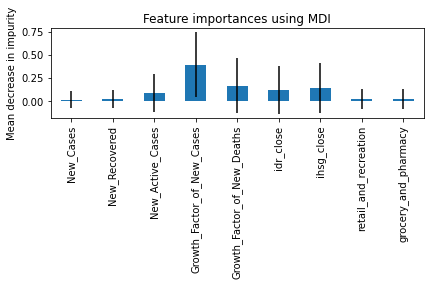

In [182]:
importances = regr.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names[0:9])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [167]:
fig = px.scatter(index_gabungan, x=index_gabungan['workplaces'], y=index_gabungan['New_Deaths'], 
                 opacity=0.8, color_discrete_sequence=['black'])

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Workplace vs Tingkat Kematian", 
                             font=dict(color='black')))

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

In [168]:
y_pred = regr.predict(X_test)
y_pred

array([133.90298268, 144.03892424, 145.19958225, 133.55887951,
       134.88971284, 124.71942857])

In [198]:
# index_gabungan['New_Deaths Predict'] = y_pred.tolist()
# index_gabungan

ValueError: Length of values (6) does not match length of index (20)

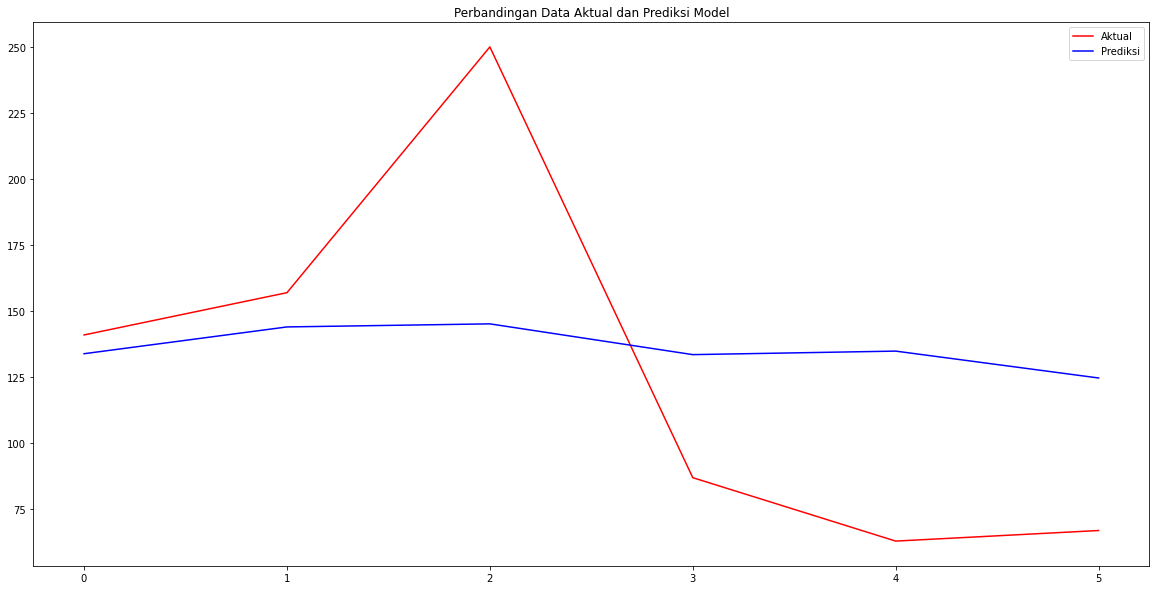

In [185]:
plt.figure(figsize=(20, 10))
plt.plot(y_test, color = 'red', label = 'Aktual')
plt.plot(y_pred, color = 'blue', label = 'Prediksi')
plt.title('Perbandingan Data Aktual dan Prediksi Model')
plt.legend()
plt.show()

In [186]:
pasien_positif = 5989
pasien_sembuh = 190
kasus_aktif = 4890
pertumbuhan_kasus_baru = 0.90
pertumbuhan_kasus_kematian = 1.43
rupiah = 14900
ihsg = 8000
retail_recreation = -25 
grocery_pharm = -35

#'New_Cases', New_Recovered', 'New_Active_Cases','Growth_Factor_of_New_Cases', 'Growth_Factor_of_New_Deaths''idr_close', 'ihsg_close', 'retail_and_recreation','grocery_and_pharmacy', 
data = [pasien_positif,pasien_sembuh,kasus_aktif,pertumbuhan_kasus_baru,pertumbuhan_kasus_kematian,rupiah,ihsg,retail_recreation,
       grocery_pharm]
prediksi_kematian = regr.predict([data])

print('Prediksi Angka Kematian = '+str(round(prediksi_kematian[0],0))+' orang')

Prediksi Angka Kematian = 154.0 orang


In [189]:
X = index_gabungan[['New_Cases', 'New_Recovered', 'New_Active_Cases','Growth_Factor_of_New_Cases',
                    'Growth_Factor_of_New_Deaths','idr_close', 'ihsg_close', 'retail_and_recreation',
                    'grocery_and_pharmacy', 'parks', 'transit_stations', 'workplaces','residential']]
X = sm.add_constant(X) 

olsmod = sm.OLS(index_gabungan['New_Deaths'], X).fit()
print(olsmod.summary())

# X = df_train_clean[['Age', 'JobLevel', 'TotalWorkingYears', 'YearsAtCompany']]
# X = sm.add_constant(X) # adding a constant

# olsmod = sm.OLS(df_train['MonthlyIncome'], X).fit()
# print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:             New_Deaths   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.518e+25
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           1.56e-76
Time:                        16:07:58   Log-Likelihood:                 487.11
No. Observations:                  20   AIC:                            -946.2
Df Residuals:                       6   BIC:                            -932.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [193]:
# R-Square
print('R2 score:', olsmod.rsquared)

R2 score: 1.0


In [194]:
# Uji F
print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)

F-statistic: 3.5178970453577576e+25
Probability of observing value at least as high as F-statistic: 1.5596121642028394e-76


In [195]:
# uji t
print(olsmod.pvalues)

const                          9.444951e-01
New_Cases                      5.266315e-76
New_Recovered                  5.291275e-76
New_Active_Cases               5.211160e-76
Growth_Factor_of_New_Cases     8.090495e-01
Growth_Factor_of_New_Deaths    9.498425e-01
idr_close                      9.783011e-01
ihsg_close                     8.839835e-01
retail_and_recreation          9.472796e-01
grocery_and_pharmacy           8.975007e-01
parks                          9.865241e-01
transit_stations               9.647035e-01
workplaces                     9.670696e-01
residential                    9.739862e-01
dtype: float64


In [200]:
# Uji Asumsi
index_gabungan['New_Deaths Prediction'] = olsmod.predict(X)
index_gabungan['residual'] = olsmod.resid
index_gabungan.head()

Date  New_Cases  New_Deaths  New_Recovered  New_Active_Cases  \
0 2021-07-06       9439         137           6100              3202   
1 2021-07-07       9365         142           3655              5568   
2 2021-07-08      12974         136          10854              1984   
3 2021-07-09      13111         138          15029             -2056   
4 2021-07-10      12920          87          16839             -4006   

   Growth_Factor_of_New_Cases  Growth_Factor_of_New_Deaths     idr_close  \
0                        0.87                         1.14  14495.000000   
1                        0.99                         1.04  14568.700195   
2                        1.39                         0.96  14569.200195   
3                        1.01                         1.01  14618.700195   
4                        0.99                         0.63  14618.700195   

    ihsg_close  retail_and_recreation  grocery_and_pharmacy  parks  \
0  6047.110840                    -19                     5    -45   
1  6044.037109                    -15                    10    -38   
2  6039.895996                    -18                     6    -41   
3  6039.844238                    -16                     6    -39   
4  6039.844238                    -16                     7    -37   

   transit_stations  workplaces  residential  New_Deaths Prediction  \
0               -22         -11            5                  137.0   
1               -30         -28            9                  142.0   
2               -31         -29           10                  136.0   
3               -30         -29           10                  138.0   
4               -30         -28           10                   87.0   

       residual  
0  9.038104e-12  
1  8.753887e-12  
2  3.581135e-12  
3  1.250555e-12  
4  1.463718e-12

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



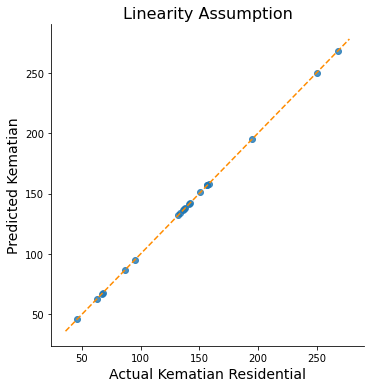

In [201]:
# linearitas
# Plotting the observed vs predicted values
sns.lmplot(x='New_Deaths', y='New_Deaths Prediction', data=index_gabungan, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(index_gabungan[['New_Deaths', 'New_Deaths Prediction']].min().min()-10, 
                        index_gabungan[['New_Deaths', 'New_Deaths Prediction']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Predicted Kematian', fontsize=14)
plt.xlabel('Actual Kematian Residential', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.14587939944853284


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

2022-02-10 16:17:14,600 - numexpr.utils - INFO - NumExpr defaulting to 4 threads.


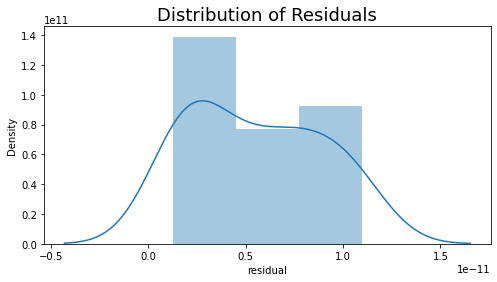

Residuals are normally distributed


In [202]:
# normalitas
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(index_gabungan['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot(index_gabungan['residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

In [203]:
X_variables = index_gabungan[['New_Cases', 'New_Recovered', 'New_Active_Cases','Growth_Factor_of_New_Cases',
                              'Growth_Factor_of_New_Deaths','idr_close', 'ihsg_close', 'retail_and_recreation',
                              'grocery_and_pharmacy', 'parks', 'transit_stations', 'workplaces','residential']]
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]
vif_data

feature            VIF
0                     New_Cases  306194.652572
1                 New_Recovered  428092.618546
2              New_Active_Cases  100705.387582
3    Growth_Factor_of_New_Cases      60.197076
4   Growth_Factor_of_New_Deaths      26.854524
5                     idr_close   55099.686469
6                    ihsg_close   71789.841541
7         retail_and_recreation    1019.356293
8          grocery_and_pharmacy      10.881068
9                         parks    3215.248253
10             transit_stations    4007.137397
11                   workplaces     235.619655
12                  residential     836.981770

In [204]:
# autokorelasi
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(index_gabungan['residual'])

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 0.0971235185830582
Signs of positive autocorrelation 

Assumption not satisfied


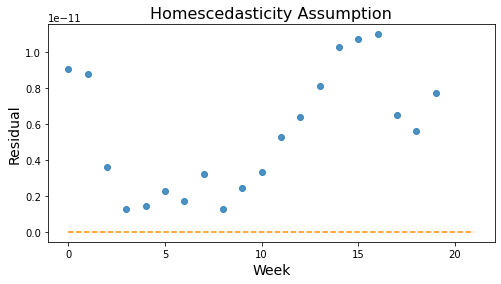

In [205]:
# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=index_gabungan.index, y=index_gabungan.residual, alpha=0.8)
plt.plot(np.repeat(0, len(index_gabungan.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('Week', fontsize=14)
plt.title('Homescedasticity Assumption', fontsize=16)
plt.show()  

# PR KITA
1. Cari metode machine learning lainnya yang supervised learning
2. Pelajari model tersebut ya ges
3. Cari data lagi sebanyak banyaknya